# Histogram ve Yoğunluk Çaprazlamalar

In [1]:
import seaborn as sns

In [2]:
diamonds=sns.load_dataset("diamonds")

In [3]:
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


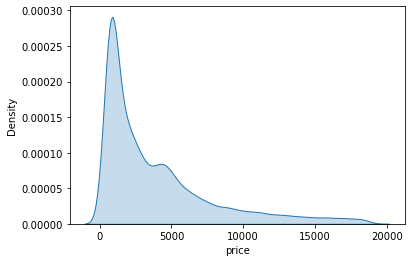

In [4]:
sns.kdeplot(df.price, shade=True);

- istatistiksel normal/standart bir dünya'da, bir sayısal değişkenin dağılımının normal olmasını bekleriz. ortadan şişkin köşelere doğru basık, yayılmış
- fakat burada ise iki tepeli bir yapı var bu da odaklanılan sayısal değişkeninin içerisindeki bilgiyi, yapıyı oluşturan birden fazla faktör var demektir.

- İki tepeli bir dağılım, veri kümesinde belirli bir eğilim veya davranışın iki farklı alt grup veya dönem arasında farklılık gösterdiğini gösterebilir. Bu tür dağılımlar, verilerin karmaşık bir yapıya sahip olduğunu ve birden fazla faktörün fiyatları etkileyebileceğini düşündürebilir.

- Bu tür veri dağılımlarının analizi, veri setinin içeriğine ve araştırılan konuya bağlı olarak, daha ileri düzeyde analitik yöntemlerin kullanılmasını gerektirebilir. Bu analitik yöntemler, farklı alt grupların belirlenmesini, ilişkili faktörlerin tanımlanmasını ve neden-sonuç ilişkilerinin anlaşılmasını sağlayabilir.

- o zaman farklı bir kategorik değişkeni boyut olarak ekleyip buna göre bir yorum yapalım.

- bir sürekli değişkenin dağılımıyla ilgili yoğunlaşmasıyla ilgili bilgi verilmektedir.
- y ekseni ile ilgilenmiyoruz. frekansların standartlaştırılmış halidir.
- price değişkeninin değerlerinin konumlanmalarıyla ilgileniyoruz, dağılımıyla ilgileniyoruz.
- price'ın dağılımı resmedilmiş

- peki bu mavi alanı oluşturan nedir? 
- araç-fiyat tahmin modeli geliştirmek üzere çalışmalara başladığımızda
- araçların fiyatı, bağımlı değişkendir yani hedef değişkendir. ana değişkendir.
- price, sayısal-ana değişkenimizdir. yapısını görselleştirdik.

- nasıl olmuş?
- çaprazlama yaparak bulabiliriz.

- price'a göre bir kdplot grafiği oluşturacağız. fakat bunu facegrid fonksiyonunu kullanarak tüm cut sınıflarıyla map'leyeceğiz.
- bir yoğunluk grafiği oluşturacağız. bunu üzerine boyut ekleyeceğiz.
- cut kategorik değişkeninin sınıflarını boyut olarak eklemek istiyoruz, çaprazlayarak değerlendirmek istiyoruz.
- bu durumda cut ile kdplot'ını map'lememiz gerekiyor, yani eşlememiz gerekiyor.

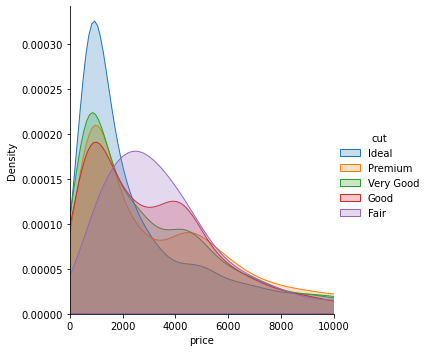

In [5]:
# FacetGrid: grafik üzerine eklenen boyutları bölerek göstermek için kullanılır
(sns
 .FacetGrid(df,
              hue="cut", # hue, boyut ekleme argümanıdır.
              height=5,
              xlim=(0,10000)) # x ekseni için aralık tanımladık
 .map(sns.kdeplot, # price'a göre bir kdplot grafiği oluşturacağız.
      "price",
      shade=True)
 .add_legend() # bilgi eklemek için, 
 # cut kategorik değişkeninin kategorilerini eklemek için
);

- price sayısal değişkeninin üzerine cut kategorik değişkenini ekledik.
- ideal, cut içerisindeki en kaliteli sınıflardan birisiydi.
- ama bakıldığında price içerisindeki fiyat skalalarını/değerlerini incelediğimizde ideal sınıfın price'ın 0 ile 2000 değerleri arasında diğerlerine göre çok daha fazla bir yer kapladığı gözlemlenir.
- fiyatın yüksek değerlerinde daha çok kaliteyi ifade eden cut kategorik değişkeninin ağırlıkla yüksek kaliteli değerleri oluşturuyordur diye tahminde bulunmuştuk. ilk oluşturduğumuz grafiklerde buna benzer bilgi veriyordu.

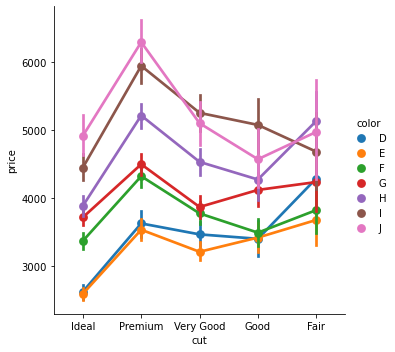

In [6]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

- 1 sayısal değişkenimiz price, 2 kategorik değişkenimiz cut ve color
- fiyatın farklı seviyelerinde iki kategorik değişkenin etkilerini görüyoruz.
- cut değişkeninin ideal sınıfında color değişkeninin kategorilerinin dağılıyor olması, yani birbirlerinden farklı seviyelerde gözlemleniyor olması color aracılığıyla cut değişkeni sınıflarının kesişiminde bir bilgi taşıdığı anlamına gelir.
- cut kategorik değişkeninin ideal sınıfının içerisinde yer alan birden farklı renk olması ve bunların birbirinden uzak olması şu anlama gelir. color aracılığıyla cut değişkeni sınıfları kesişiminde bir bilgi taşıyor. birbirinden farklı bilgi taşınır.
- cut'ın ideal sınıfı içerisinde color'ın e ve d sınıfının taşıdığı bilgi birbiriyle aynı diğer renklere baktığımızda ise birbirinden farklı yerlerdedirler
- makine öğrenmesinde amacımız hedeflediğimiz bağımlı değişkende var olan bilgiyi, var olan değişimi farklı değişkenlerce açıklamaya çalışmaktır.
- bu değişimi farklı değişkenlerce açıklamaya çalışmak amacının en büyük hedefi veri setinin içerisindeki hedef değişken hedefiyle değişkenliklerin bulunmaya çalışılmasıdır. 
- price değişkeninin içerisindeki bu değişimi diğer değişkenlerce açıklamaya çalışmak.
- diğer değişkenlerce price'in açıklanma çabasının en önemli noktası ise price'ın içerisinde bu değişkenlerin ayırt edici bilgi taşıması
- ayırt edicilik, ideal sınıfının altında color değişkeninin farklı sınıflarının farklı değerler oluşturmuş olması burada color'ın cut ile kesiştirildiğinde ideal sınıfı altında ayırt edici bir bilgi taşıdığı anlamına gelir.price'a göre
- price değşkeninin aralığı 0-6500 arasına indirgenmiş. bunlar toplulaştırılmış değerler 2 groupby ile ulaşacağımız ortalama değerler ve çubuklar ile bunların etrafındaki sapmalar ifade edilmiş.